# Data Read-in, QC, & Data merge

In this notebook, the data will be read in from the CellRanger output matrix, The relevent quality measures will be visualized and explored, filtered based  on these measures then the seperate datasets merged together into a single Anndata object which will be saved for loading into the net notebook. A report should also be able to be generated which contains the initial initial stats, QC figures, post-filtering stats. 

## Packages and Read-in 

import necesary packages/modules here followed by reading the 7 datasets as 10x Cellranger matrix files into anndata objects using the scanpy read_10x_mtx function, each dataset and a name as a dicitonary key/value pair, so the initial steps can be done on each serperately easily.



In [15]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

# Modify the sys.path to include the notebook directory to import functions
import sys
import os

notebook_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)

import func_lib as f

In [2]:

adatas = {
    "D1" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/collect_tube_1_batch_3_June_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D2" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/collect_tube_2_batch_3_june_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D3" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/Isol_Microglia_EFAD_TD_august_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D4" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/MICROGLIA_E3E4FAD_TD_23_05_2023_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D5" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/Tube_1_July_20_TD_YYRFC_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D6" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/Tube2_July_20_TD_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    "D7" : sc.read_10x_mtx(
        "/Users/loganlarlham/Documents/Summer_proj_2024/Results_HT/Tube3_july_20_TD_outs/filtered_feature_bc_matrix",
        var_names="gene_symbols",
        cache=False,
        make_unique=True,
        gex_only=False),
    }



## QC measures

Next we will use the summarize_adata function to print out basic stats about each dataset, and then visualize_QC_measures to plot these basic QC measures for analysis.

*note: summarize_adata print out could be improved, formatting wise
**note: color legend on scatterplot of visualize function is fkced up



In [3]:
# Print Quality Control metric for each dataset
for adata_key, adata in adatas.items():
    print(f"{adata_key}:")
    f.summarize_adata(adata, mt_gene_prefix="mt-", ribo_gene_prefixes=("Rps", "Rpl"), min_counts=1000, min_genes=300, min_cells=3)
    print("\n")

D1:
Number of cells with fewer than 1000 UMI counts: 288
Number of cells with fewer than 300 genes: 2
Number of genes expressed in fewer than 3 cells: 18651
Number of mitochondrial genes: 13
Number of ribosomal genes: 102
Percentage of total reads from mitochondrial genes: 1.68%
Percentage of total reads from ribosomal genes: 18.38%
Average reads per cell from mitochondrial genes: 147.05
Average reads per cell from ribosomal genes: 1779.73
Average percentage of mitochondrial reads per cell: 1.68%
Average percentage of ribosomal reads per cell: 18.38%
Current Anndata has 3723 cells and 33993 genes, with a total amount of 34316840.0 UMI counts


D2:
Number of cells with fewer than 1000 UMI counts: 149
Number of cells with fewer than 300 genes: 0
Number of genes expressed in fewer than 3 cells: 18272
Number of mitochondrial genes: 13
Number of ribosomal genes: 102
Percentage of total reads from mitochondrial genes: 1.50%
Percentage of total reads from ribosomal genes: 13.45%
Average reads

Visualizations QC Measures for multiple datasets:


/Users/loganlarlham/Documents/Summer_proj_2024/Notebooks/func_lib.py:127: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_data = adata[list(adata.keys())[0]].concatenate(*[adata[key] for key in list(adata.keys())[1:]], batch_key="dataset", batch_categories=list(adata.keys()))


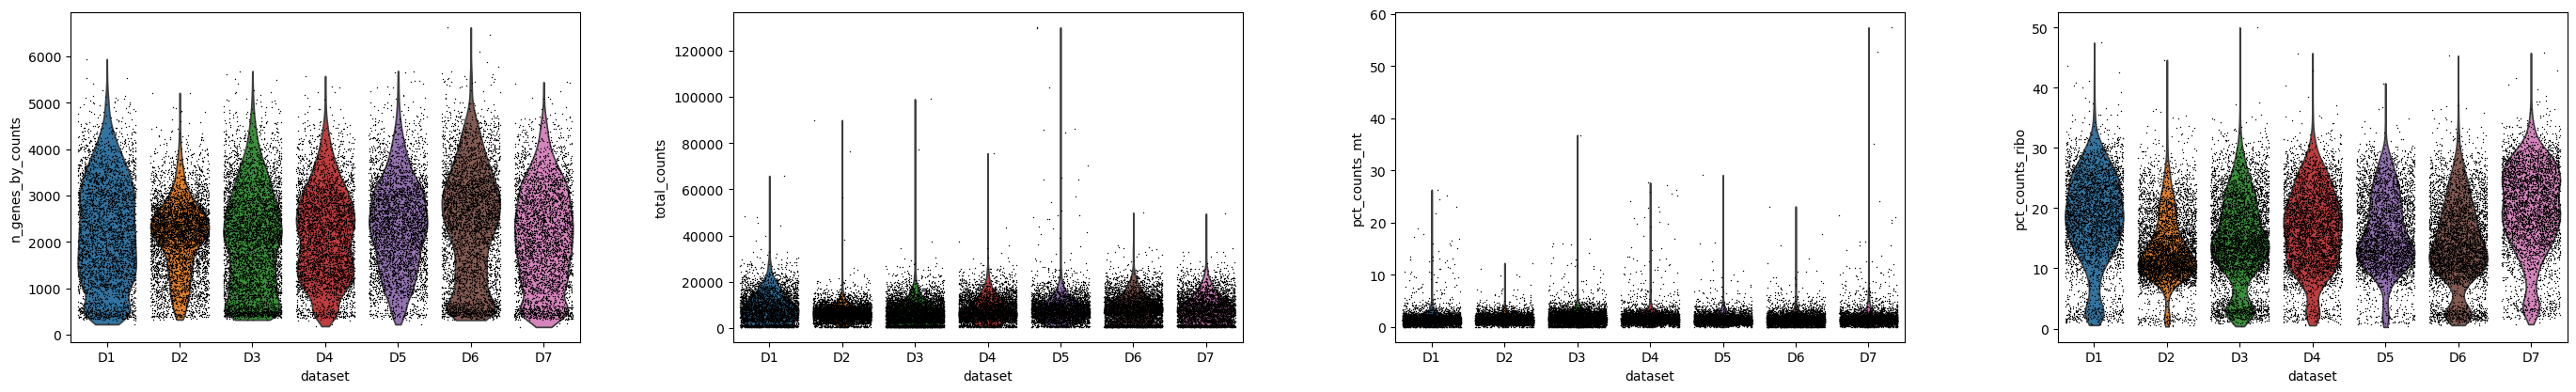

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

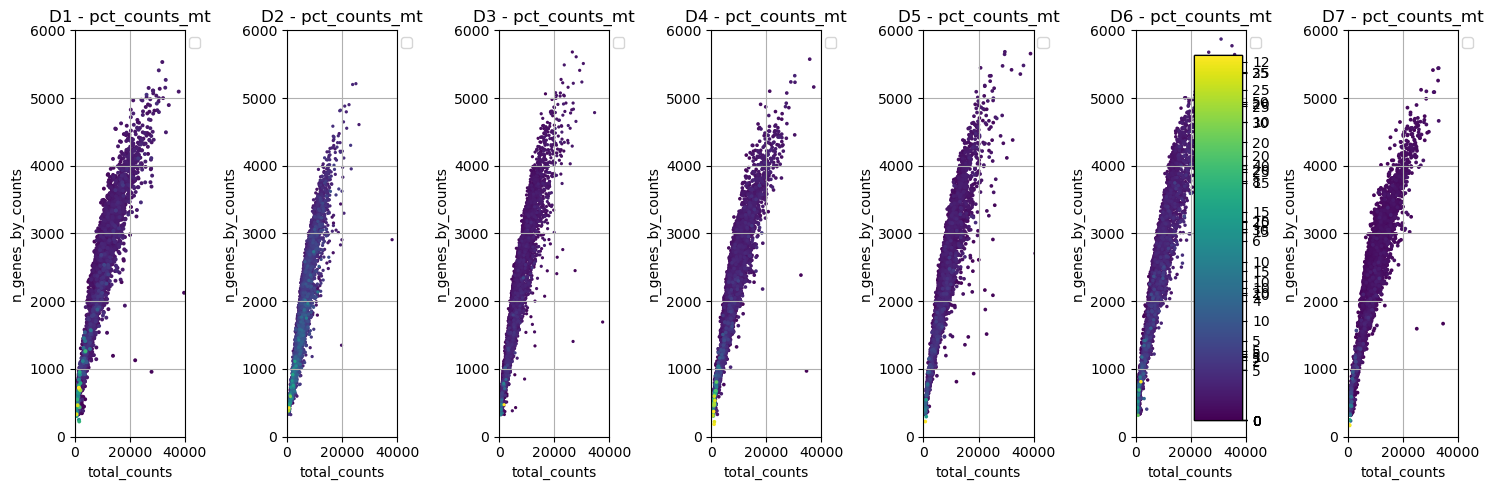

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

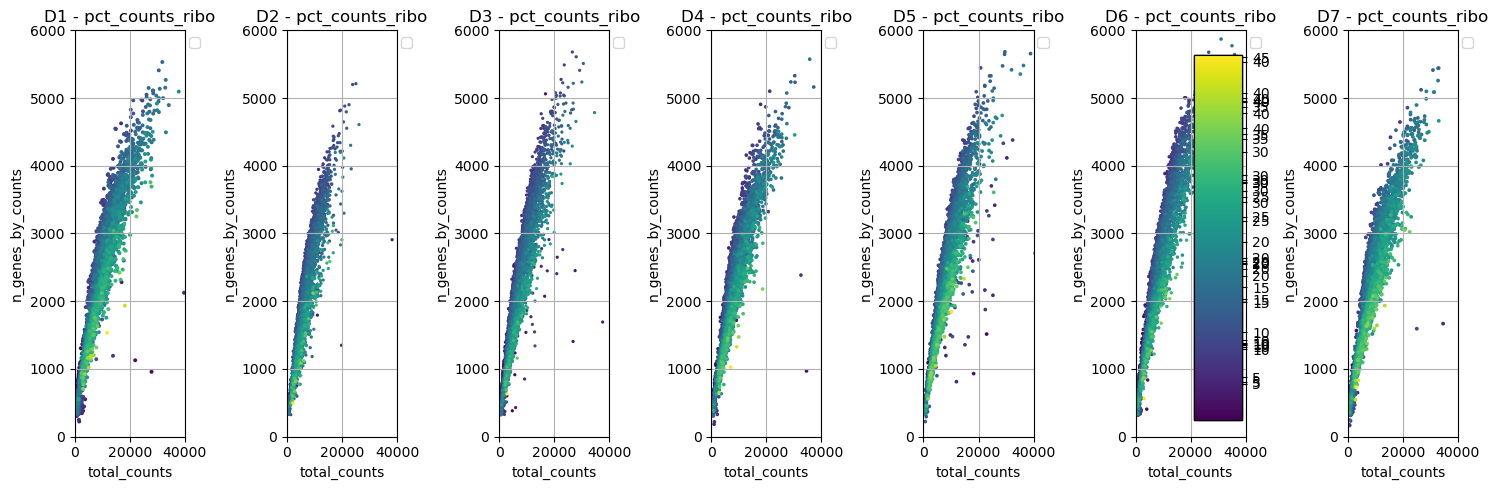

In [4]:
# Visualize pre-filtering QC measures
f.visualize_QC_measures(adatas)

## QC filtering 

Here we use the filtering function to filter cells and genes based on most basic parameters. for cells we will use a max mitochondrial gene read % of 5(explained in literature) and a minimum ribosomal gene expression of 5%. minimum count per cell of 1000, cell ranger itself has a minimum of 500, however we up the minimum which mostly gets rid of this population of very low-quality/odd cells. need to discuss with Yiyi if she agrees, but it does help. minimum gene count of 300. for genes we filter all that are not in atleast 3 cells. 

after filtering we visualize again so they can be compared.

*note: want to make a function to do median deviation thresholding, see how it compares

In [5]:
# Basic QC thresholds
QC_filtered_adatas = {}
for adata_key, adata in adatas.items():
    print(f"{adata_key}:")
    QC_filtered_adatas[adata_key] =f.QC_filter_adata(adata, mt_threshold=5, ribo_threshold=5, min_counts=1000, min_genes=300, min_cells=3)
    print("\n")

D1:
87 of 3723 cells contain more than 5% mitochondrial genes. Will be filtered
281 of 3723 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D2:
30 of 5399 cells contain more than 5% mitochondrial genes. Will be filtered
182 of 5399 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D3:
96 of 5584 cells contain more than 5% mitochondrial genes. Will be filtered
720 of 5584 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D4:
107 of 4315 cells contain more than 5% mitochondrial genes. Will be filtered
224 of 4315 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D5:
50 of 4159 cells contain more than 5% mitochondrial genes. Will be filtered
143 of 4159 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D6:
78 of 4757 cells contain more than 5% mitochondrial genes. Will be filtered
556 of 4757 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number




D7:
122 of 4010 cells contain more than 5% mitochondrial genes. Will be filtered
230 of 4010 cells contain less than 5% ribosomal genes. Will be filtered


/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:158: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number


Visualizations QC Measures for multiple datasets:


/Users/loganlarlham/Documents/Summer_proj_2024/Notebooks/func_lib.py:127: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_data = adata[list(adata.keys())[0]].concatenate(*[adata[key] for key in list(adata.keys())[1:]], batch_key="dataset", batch_categories=list(adata.keys()))


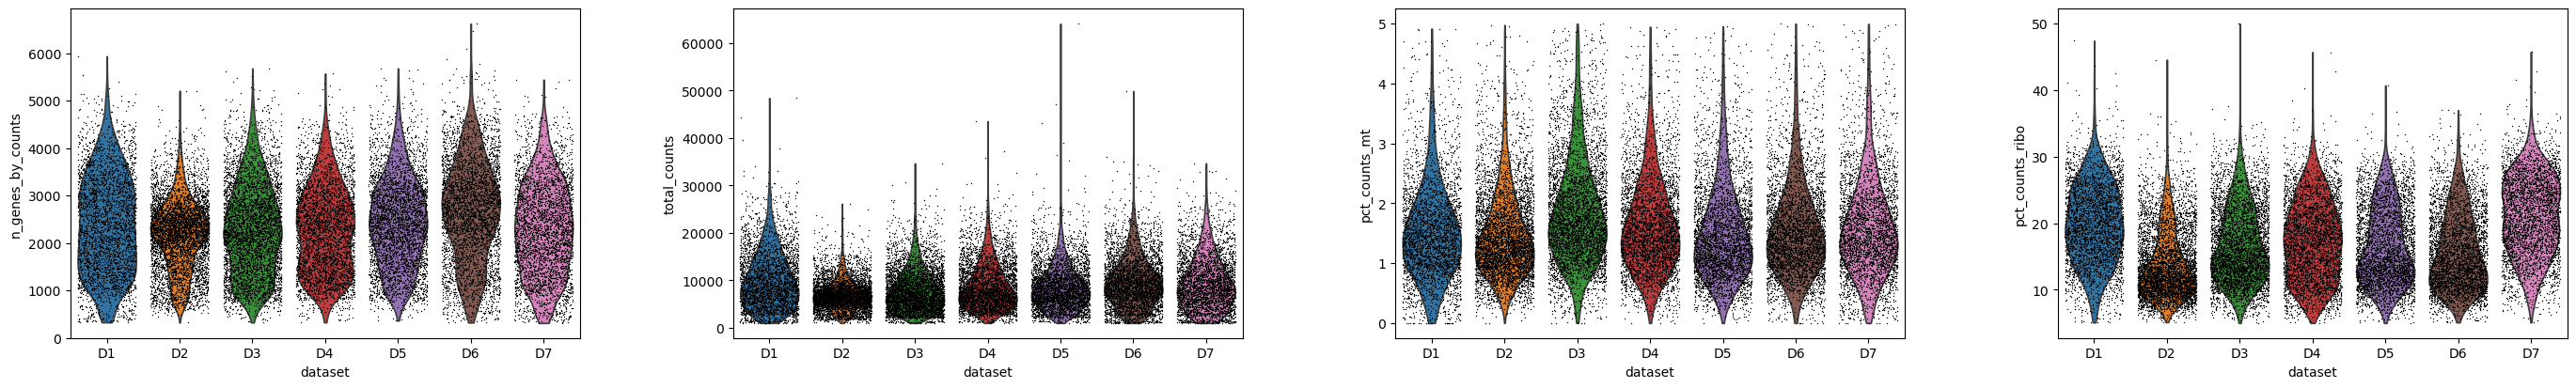

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

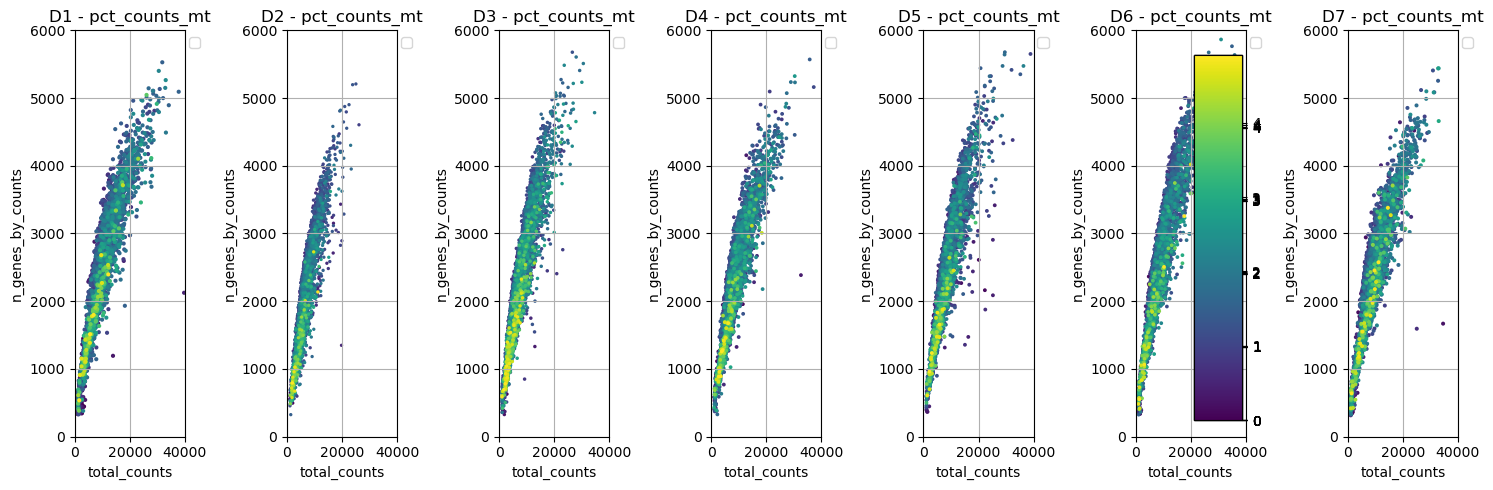

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

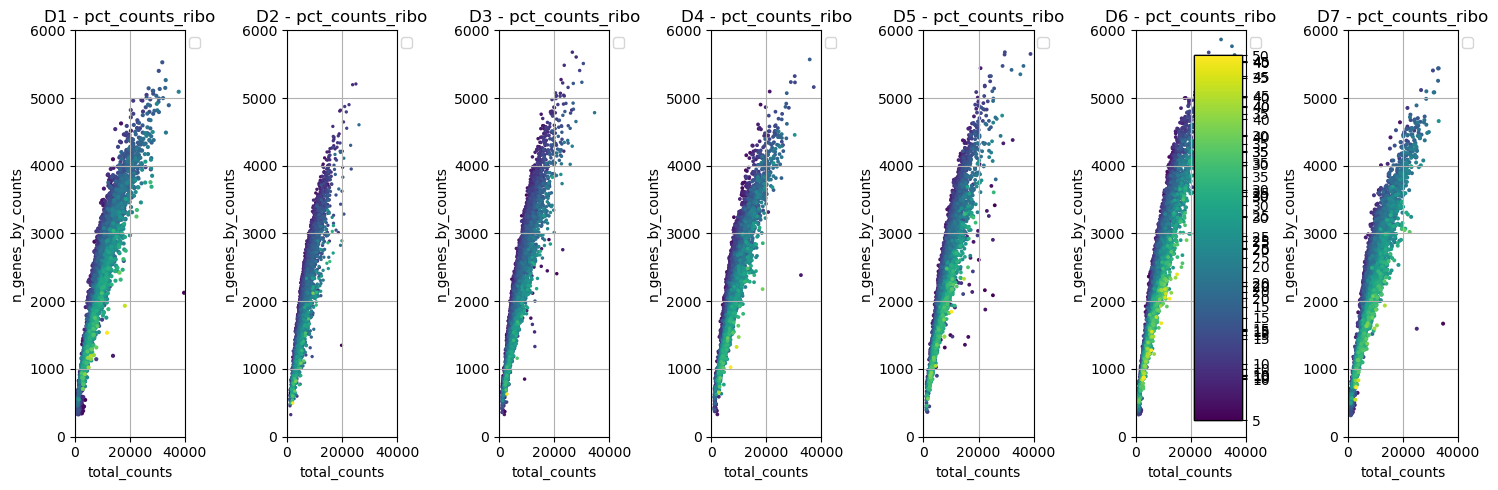

In [6]:
f.visualize_QC_measures(QC_filtered_adatas)

## Demultiplex hashtag

Using hash_demultiplex (calls hashsolo) function we associate each cell with the individual it was sampled from so we can know the genotype/treatment status of each cell. Based on hashtag counts will classify some cells as doublets and some as negative(empty). THese will be ignored for downstream analysis. they are kept in the dataset, but perhaps should consider just removing them here.

In [7]:
#Demultiplex hashtags from datasets
for adata_key, adata in QC_filtered_adatas.items():
    print(f"{adata_key}:")
    f.hash_demulitplex(adata)
    print("\n")

D1:
Number of predicted singlets: 3126
Number of predicted doublets: 190
Number of predicted negatives: 8
Number of cells for each hashtag:
K234: 872
K219: 790
K231: 754
K233: 710
Doublet: 190
Negative: 8


D2:
Number of predicted singlets: 4950
Number of predicted doublets: 228
Number of predicted negatives: 4
Number of cells for each hashtag:
G180: 1273
G143: 1243
G146: 1227
K232: 1207
Doublet: 228
Negative: 4


D3:
Number of predicted singlets: 4376
Number of predicted doublets: 336
Number of predicted negatives: 1
Number of cells for each hashtag:
K262: 1216
K261: 1187
K257: 1118
K268: 855
Doublet: 336
Negative: 1


D4:
Number of predicted singlets: 3725
Number of predicted doublets: 269
Number of predicted negatives: 1
Number of cells for each hashtag:
G122: 1065
G119: 918
G118: 872
G120: 870
Doublet: 269
Negative: 1


D5:
Number of predicted singlets: 3704
Number of predicted doublets: 247
Number of predicted negatives: 1
Number of cells for each hashtag:
G184: 1052
G183: 959
G18

Remove all cells marked as doublet or negative from dataset, not useful. 

In [8]:
#remove doublets and empty droplets from datasets 
for adata_key, adata in QC_filtered_adatas.items():
    print(f"Removing doublets and empty droplets from {adata_key}:")
    print(f"number of cells before: {adata.obs.shape[0]}")
    doublets = adata.obs['most_likely_hypothesis'] == 2
    negatives = adata.obs['most_likely_hypothesis'] == 0
    adata = adata[~doublets & ~negatives]
    QC_filtered_adatas[adata_key] = adata
    print(f"number of cells after: {adata.obs.shape[0]}")
    print("\n")

Removing doublets and empty droplets from D1:
number of cells before: 3324
number of cells after: 3126


Removing doublets and empty droplets from D2:
number of cells before: 5182
number of cells after: 4950


Removing doublets and empty droplets from D3:
number of cells before: 4713
number of cells after: 4376


Removing doublets and empty droplets from D4:
number of cells before: 3995
number of cells after: 3725


Removing doublets and empty droplets from D5:
number of cells before: 3952
number of cells after: 3704


Removing doublets and empty droplets from D6:
number of cells before: 4082
number of cells after: 3873


Removing doublets and empty droplets from D7:
number of cells before: 3570
number of cells after: 3367




## Data Merge

Next we merge all the datasets into one

In [9]:
for adata_key, adata in QC_filtered_adatas.items():
    print(f"dataset {adata_key}:")
    for index, row in adata.var.iterrows():
        if row['feature_types'] == 'Antibody Capture':
            print(f"gene_ids: {row['gene_ids']}, Name: {index}")



dataset D1:
gene_ids: Hashtag_1, Name: K231
gene_ids: Hashtag_2, Name: K233
gene_ids: Hashtag_3, Name: K234
gene_ids: Hashtag_4, Name: K219
dataset D2:
gene_ids: Hashtag_1, Name: G143
gene_ids: Hashtag_2, Name: G146
gene_ids: Hashtag_3, Name: K232
gene_ids: Hashtag_4, Name: G180
dataset D3:
gene_ids: Hashtag_1, Name: K257
gene_ids: Hashtag_2, Name: K261
gene_ids: Hashtag_3, Name: K262
gene_ids: Hashtag_4, Name: K268
dataset D4:
gene_ids: Hashtag_1, Name: G118
gene_ids: Hashtag_2, Name: G119
gene_ids: Hashtag_3, Name: G120
gene_ids: Hashtag_4, Name: G122
dataset D5:
gene_ids: Hashtag_1, Name: G183
gene_ids: Hashtag_2, Name: G184
gene_ids: Hashtag_3, Name: G185
gene_ids: Hashtag_4, Name: G186
dataset D6:
gene_ids: Hashtag_1, Name: K248
gene_ids: Hashtag_2, Name: K249
gene_ids: Hashtag_3, Name: K250
gene_ids: Hashtag_4, Name: K252
dataset D7:
gene_ids: Hashtag_1, Name: G177
gene_ids: Hashtag_2, Name: G178
gene_ids: Hashtag_3, Name: G179
gene_ids: Hashtag_4, Name: G145


In [10]:
# Function to align .var columns and print misaligned columns
def align_var_columns(adatas):
    # Get the union of all column names
    all_columns = set()
    for adata in adatas.values():
        all_columns.update(adata.var.columns)

    # Align columns for each dataset and print misaligned columns
    for adata_key, adata in adatas.items():
        misaligned_columns = [col for col in all_columns if col not in adata.var.columns]
        if misaligned_columns:
            print(f"{adata_key} is missing columns: {misaligned_columns}")
        for col in misaligned_columns:
            adata.var[col] = None  # or some appropriate default value
        # Ensure columns are in the same order
        adata.var = adata.var[list(all_columns)]

# Example usage with your datasets
align_var_columns(QC_filtered_adatas)


In [11]:
genotype_map = {"K191" : "E3FAD", "K192" : "E3FAD", "K190" : "E3WT", "K193" : "E3WT", 
                "G118" : "E4FAD", "G119" : "E4FAD", "G120" : "E4FAD", "G122" : "E4WT",
                "K231" : "E3FAD", "K233" : "E3FAD", "K234" : "E3FAD", "K219" : "E4FAD",
                "G143" : "E4WT", "G146" : "E4WT", "K232" : "E3WT", "G180" : "E4WT", 
                "G183" : "E4WT", "G184" : "E4WT", "G185" : "E4WT", "G186" : "E4FAD",
                "K248" : "E3WT", "K249" : "E3WT", "K250" : "E3FAD", "K252" : "E3FAD", 
                "G177" : "E4FAD", "G178" : "E4FAD", "G179" : "E4FAD", "G145" : "E4FAD",
                "K257" : "E3WT", "K261" : "E3WT", "K262" : "E3WT", "K268" : "E3FAD",
                "K283" : "E3WT", "K284" : "E3FAD"}
treatment_map = {"K191" : "LPS", "K192" : "LPS", "K190" : "LPS", "K193" : "LPS", 
                "G118" : "VEHICLE", "G119" : "VEHICLE", "G120" : "VEHICLE", "G122" : "VEHICLE",
                "K231" : "VEHICLE", "K233" : "VEHICLE", "K234" : "VEHICLE", "K219" : "LPS",
                "G143" : "LPS", "G146" : "LPS", "K232" : "VEHICLE", "G180" : "LPS", 
                "G183" : "VEHICLE", "G184" : "VEHICLE", "G185" : "VEHICLE", "G186" : "VEHICLE",
                "K248" : "LPS", "K249" : "LPS", "K250" : "LPS", "K252" : "LPS", 
                "G177" : "LPS", "G178" : "LPS", "G179" : "LPS", "G145" : "LPS",
                "K257" : "VEHICLE", "K261" : "VEHICLE", "K262" : "VEHICLE", "K268" : "VEHICLE",
                "K283" : "LPS", "K284" : "LPS"}


adata = ad.concat(list(QC_filtered_adatas.values()), axis=0, label="sample", join="outer", merge="unique")

adata.obs["genotype"] = adata.obs["Classification"].map(lambda x: genotype_map.get(x, None))

# Mapping for apoe (first two characters of the genotype value)
adata.obs["apoe"] = adata.obs["Classification"].map(lambda x: genotype_map.get(x, None)[:2] if genotype_map.get(x, None) else None)

# Mapping for disease (characters after the first two characters of the genotype value)
adata.obs["disease"] = adata.obs["Classification"].map(lambda x: genotype_map.get(x, None)[2:] if genotype_map.get(x, None) else None)
adata.obs["treatment"] = adata.obs["Classification"].map(lambda x: treatment_map.get(x, None))
adata
    

/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 27121 × 17443
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes', 'Classification', 'most_likely_hypothesis', 'sample', 'genotype', 'apoe', 'disease', 'treatment'

In [12]:
# Check if 'G118' is in the .var DataFrame after concatenation
for hashtag in genotype_map.keys():
    if hashtag in adata.var_names:
        print(f"{hashtag} is present in the .var DataFrame.")
    else:
        print(f"{hashtag} is not present in the .var DataFrame.")

K191 is not present in the .var DataFrame.
K192 is not present in the .var DataFrame.
K190 is not present in the .var DataFrame.
K193 is not present in the .var DataFrame.
G118 is present in the .var DataFrame.
G119 is present in the .var DataFrame.
G120 is present in the .var DataFrame.
G122 is present in the .var DataFrame.
K231 is present in the .var DataFrame.
K233 is present in the .var DataFrame.
K234 is present in the .var DataFrame.
K219 is present in the .var DataFrame.
G143 is present in the .var DataFrame.
G146 is present in the .var DataFrame.
K232 is present in the .var DataFrame.
G180 is present in the .var DataFrame.
G183 is present in the .var DataFrame.
G184 is present in the .var DataFrame.
G185 is present in the .var DataFrame.
G186 is present in the .var DataFrame.
K248 is present in the .var DataFrame.
K249 is present in the .var DataFrame.
K250 is present in the .var DataFrame.
K252 is present in the .var DataFrame.
G177 is present in the .var DataFrame.
G178 is p

In [13]:
# remove hashtag genes

hashtag_genes = [gene for gene in adata.var_names if any(ht in gene for ht in genotype_map.keys())]
adata = adata[:, ~adata.var_names.isin(hashtag_genes)]

# Check if hashtag is in the .var DataFrame after concatenation
for hashtag in genotype_map.keys():
    if hashtag in adata.var_names:
        print(f"{hashtag} is present in the .var DataFrame.")
    else:
        print(f"{hashtag} is not present in the .var DataFrame.")

K191 is not present in the .var DataFrame.
K192 is not present in the .var DataFrame.
K190 is not present in the .var DataFrame.
K193 is not present in the .var DataFrame.
G118 is not present in the .var DataFrame.
G119 is not present in the .var DataFrame.
G120 is not present in the .var DataFrame.
G122 is not present in the .var DataFrame.
K231 is not present in the .var DataFrame.
K233 is not present in the .var DataFrame.
K234 is not present in the .var DataFrame.
K219 is not present in the .var DataFrame.
G143 is not present in the .var DataFrame.
G146 is not present in the .var DataFrame.
K232 is not present in the .var DataFrame.
G180 is not present in the .var DataFrame.
G183 is not present in the .var DataFrame.
G184 is not present in the .var DataFrame.
G185 is not present in the .var DataFrame.
G186 is not present in the .var DataFrame.
K248 is not present in the .var DataFrame.
K249 is not present in the .var DataFrame.
K250 is not present in the .var DataFrame.
K252 is not

## Normalization and Feature selection

In this section we will make a adata layer which contains log1p normalized  counts which will be used for certain steps. also detect highly variable genes using scanpy function

Text(0, 0.5, 'Number of cells')

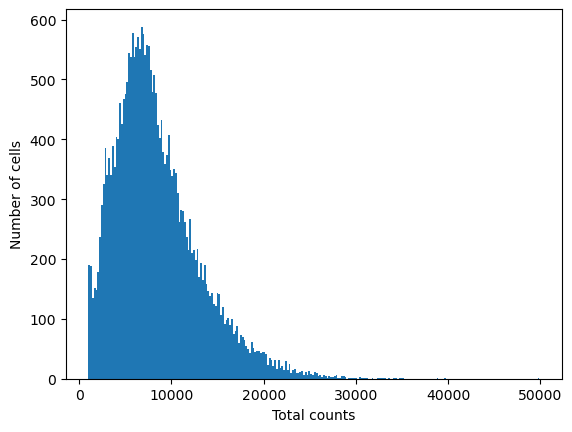

In [16]:
# plot raw UMI counts per cell in histogram 

plt.hist(adata.obs["total_counts"], bins=250, log=False, label="Total counts in bins of 100")
plt.xlabel("Total counts")
plt.ylabel("Number of cells")



In [17]:
# save raw counts as layer in adata for future use

In [18]:
adata.layers["counts"] = adata.X.copy()

/var/folders/n8/l_thwp511tqdnvx3xvmjy3y80000gn/T/ipykernel_16997/1517723426.py:1: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()
/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/loganlarlham/miniforge3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


(array([  6.,   8.,  10.,   9.,  16.,  19.,  20.,  25.,  18.,  31.,  22.,
         27.,  40.,  29.,  37.,  48.,  54.,  50.,  59.,  62.,  84.,  89.,
        100., 119., 124., 147., 147., 187., 200., 220., 252., 259., 313.,
        269., 292., 351., 349., 397., 410., 381., 394., 400., 457., 377.,
        451., 445., 458., 433., 392., 397., 391., 420., 391., 405., 466.,
        457., 541., 548., 598., 636., 642., 706., 744., 768., 795., 788.,
        777., 733., 736., 714., 654., 599., 515., 499., 423., 377., 353.,
        303., 284., 240., 204., 163., 137., 119., 106.,  94.,  70.,  52.,
         44.,  33.,  41.,  24.,  14.,  12.,  10.,   1.,   3.,   4.,   1.,
          2.]),
 array([ 935.46374512,  959.66217041,  983.86065674, 1008.05908203,
        1032.25756836, 1056.45593262, 1080.65441895, 1104.8527832 ,
        1129.05126953, 1153.24975586, 1177.44812012, 1201.64660645,
        1225.84509277, 1250.04345703, 1274.24194336, 1298.44030762,
        1322.63879395, 1346.83728027, 1371.035

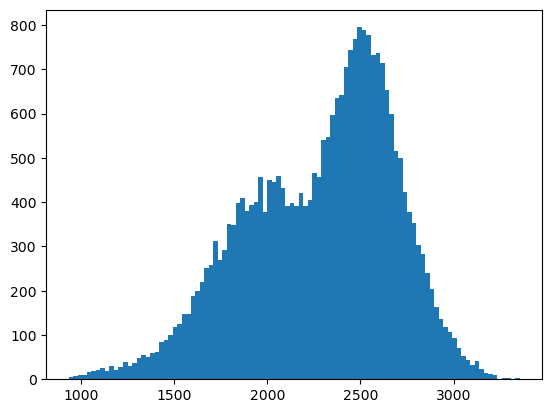

In [19]:
# normalize and log the data and store that in a different layer too incase we need to switch between them.
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers['log_norm'] = adata.X.copy()
#so we can plot a histogram of the total counts/cells after norm
adata.obs["norm_total_counts"] = adata.X.sum(axis=1)
plt.hist(adata.obs["norm_total_counts"], bins=100, log=False, label="normed total counts in bins of 100")

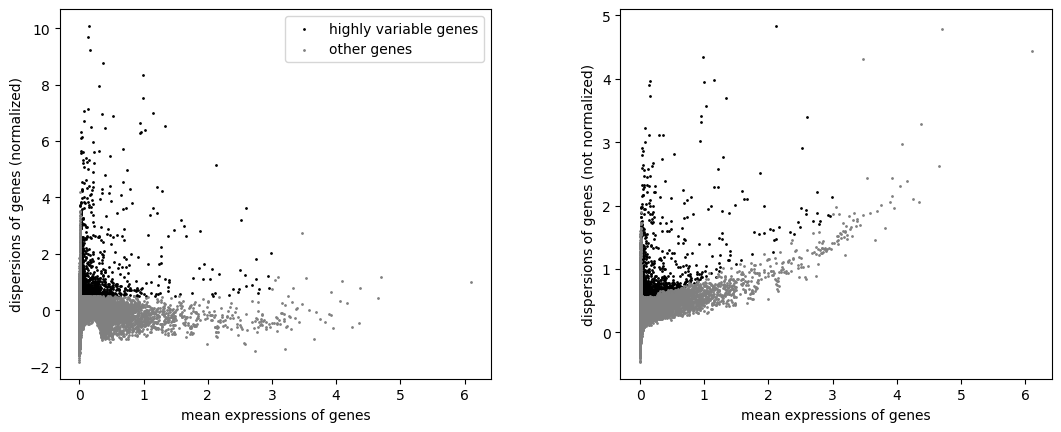

1336 out of 17415 genes are considered highly variable.


In [20]:
sc.pp.highly_variable_genes(adata, batch_key="sample")
sc.pl.highly_variable_genes(adata)
#make some variables to print a nice little summary
num_highly_variable_genes_t = adata.var['highly_variable'].sum()
total_genes_t = adata.var.shape[0]

print(f"{num_highly_variable_genes_t} out of {total_genes_t} genes are considered highly variable.")

## Save adata object

Finally we save the adata object for use in the next notebooks, batch correction and Analysis. 

In summary this Adata object contains all the datasets merged into one object and:
- hashtag genes removed
- the dataset they came from annotated under .obs['sample']
- the disease-state FAD or WT saved in .obs['disease']
- the apoe isoform, E3 or E4, saved in .obs['apoe']
- the treatment, LPS or VEH saved in .obs['treatment']
and the complete genotype E3WT, E4WT, E3FAD, E4FAD, in .obs['genotype']
- two layers .layer['counts'] containing raw and ['log_norm'] with normed
- basic QC metrics. 

In [21]:
# save adata to file for future use
adata.write("QC_merge_output_adata.h5ad")